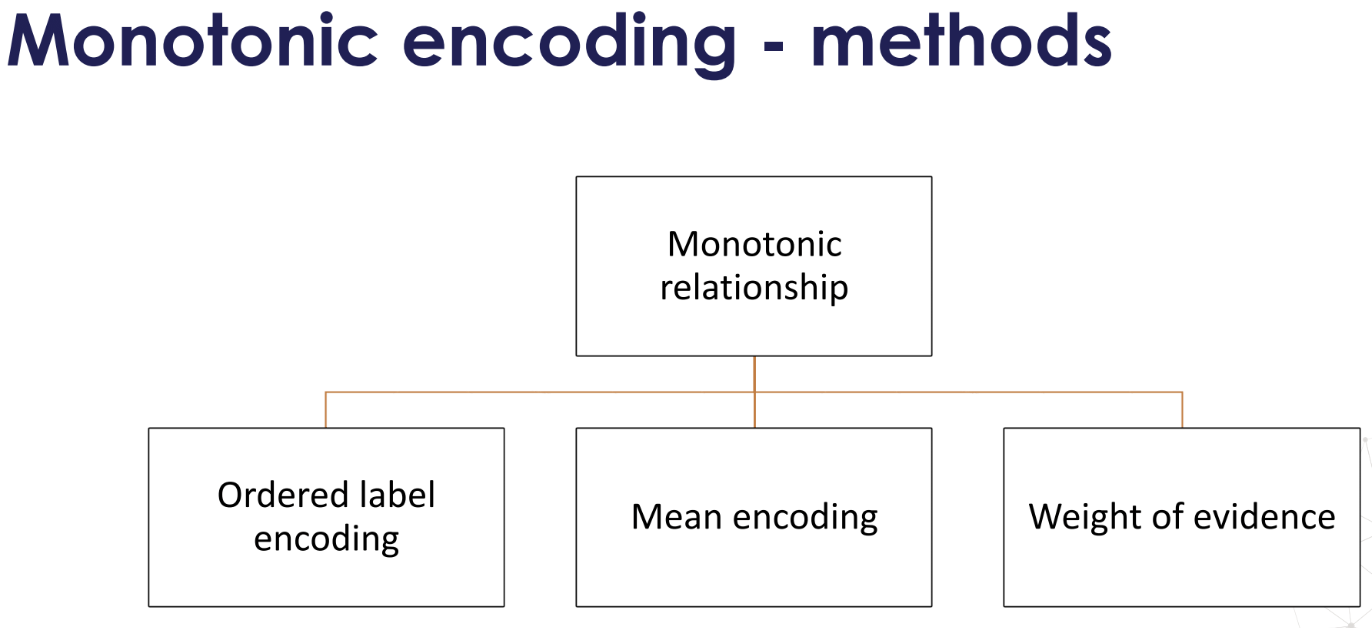

**A monotonic relationship is a relationship that does one of the following:**

* as the value of one variable increases, so does the value of the other variable; or
* as the value of one variable increases, the value of the other variable decreases.

**Advantages of target guided encodings**
* Capture the predictive value of each category.
* Create a monotonic relationship between the variable and the target
* Create features suitable for linear models
* Do not expand the feature space

# Ordered Ordinal Encoding

Ordering the categories according to the target means assigning a number to the category from 1 to k, where k is the number of distinct categories in the variable, but this numbering is informed by the mean of the target for each category.

For example, we have the variable city with values London, Manchester and Bristol; if the default rate is 30% in London, 20% in Bristol and 10% in Manchester, then we replace London by 1, Bristol by 2 and Manchester by 3.

**When to use**

When you have a categorical variable with a natural order: For example, educational levels (e.g., high school, bachelor's, master's, PhD) or ratings (e.g., poor, average, good, excellent).

Ordered Ordinal Encoding: Preserves and utilizes the natural order of categories.

## Pre-requisites: Explore original relationship between categorical variables and target


In [ ]:
# let's explore the relationship of the categories with the target

for var in ["Neighborhood", "Exterior1st", "Exterior2nd"]:

    fig = plt.figure()
    fig = y_train.groupby(X_train[var]).mean().plot()
    fig.set_title("Relationship between {} and SalePrice".format(var))
    fig.set_ylabel("Mean SalePrice")
    plt.show()

### Pandas

In [ ]:
# Step 1: Order labels by the mean target value
# Group target values by the 'Neighborhood' feature and calculate their mean, then sort the values
y_train.groupby(X_train["Neighborhood"]).mean().sort_values()

# Step 2: Generate an ordered list of labels
# Extract the ordered labels (neighborhoods) based on their mean target values
ordered_labels = y_train.groupby(X_train["Neighborhood"]).mean().sort_values().index

# Step 3: Create a dictionary mapping categories to numbers
# Create a mapping of each neighborhood label to an integer based on the order determined above
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

# Step 4: Replace labels with corresponding integers
# Replace the 'Neighborhood' labels in the training set with the mapped integers
X_train["Neighborhood"] = X_train["Neighborhood"].map(ordinal_mapping)
# Replace the 'Neighborhood' labels in the test set with the mapped integers
X_test["Neighborhood"] = X_test["Neighborhood"].map(ordinal_mapping)

# Step 5: Explore the result
# Display the first 10 values of the transformed 'Neighborhood' feature in the training set
X_train["Neighborhood"].head(10)

#### Inspect for training set (Optional)

In [ ]:
# let's inspect the newly created monotonic relationship
# between the variables and the target

for var in ["Neighborhood", "Exterior1st", "Exterior2nd"]:

    fig = plt.figure()
    fig = y_train.groupby(X_train[var]).mean().plot()
    fig.set_title("Monotonic relationship between {} and SalePrice".format(var))
    fig.set_ylabel("Mean SalePrice")
    plt.show()

#### Inspect for testing set (Optional)

In [ ]:
# let's inspect the newly created monotonic relationship
# between the variables and the target

for var in ["Neighborhood", "Exterior1st", "Exterior2nd"]:

    fig = plt.figure()
    fig = y_test.groupby(X_test[var]).mean().plot()
    fig.set_title("Monotonic relationship between {} and SalePrice".format(var))
    fig.set_ylabel("Mean SalePrice")
    plt.show()

### Feature Engine

In [ ]:
# Step 1: Import OrdinalEncoder from Feature-engine
# Import the OrdinalEncoder class to perform ordinal encoding on categorical variables
from feature_engine.encoding import OrdinalEncoder

# Step 2: Instantiate the OrdinalEncoder
# Create an OrdinalEncoder object with the 'ordered' encoding method and specify the variables to be encoded
ordinal_enc = OrdinalEncoder(
    encoding_method="ordered",  # Ensure labels are encoded based on target order, not arbitrarily
    variables=["Neighborhood", "Exterior1st", "Exterior2nd"],  # Specify variables to encode
)

# Step 3: Fit the encoder to the training data
# Fit the OrdinalEncoder to the training data, passing the target variable to establish the order
ordinal_enc.fit(X_train, y_train)

# Step 4: Observe the encoder dictionary
# Check the mapping of categories to numbers for each specified variable
ordinal_enc.encoder_dict_

# Step 5: List variables to be transformed
# Retrieve the list of variables that the encoder will transform
ordinal_enc.variables_

# Step 6: Transform the training and test data
# Apply the encoding to the training data
X_train = ordinal_enc.transform(X_train)
# Apply the encoding to the test data
X_test = ordinal_enc.transform(X_test)

# Step 7: Explore the result
# Display the first few rows of the transformed training data
X_train.head()

#### Note:

* If the argument variables is left to None, then the encoder will automatically identify all categorical variables. Is that not sweet?
* The encoder will not encode numerical variables. So if some of your numerical variables are in fact categories, you will need to re-cast them as object before using the encoder.
* Finally, if there is a label in the test set that was not present in the train set, the encoder will through and error, to alert you of this behaviour.

# Mean Encoding

**Mean encoding is a powerful technique used in machine learning, particularly with categorical variables. It is especially useful in the following situations:**

*  You have categorical variables with a large number of unique categories (e.g., ZIP codes, product IDs).
* You believe that a categorical variable has a significant relationship with the target variable.
* There is no natural order in the categories, but you suspect that some categories might inherently relate to the target variable in an ordinal manner.
* You are working with models like decision trees, random forests, or gradient boosting machines.
* You want to enhance the interpretability of your model by ensuring that categorical variables are represented in a way that reflects their relationship with the target.

**When to use**
* Mean encoding can lead to overfitting if the same data is used for both encoding and model training. To mitigate this, techniques like cross-validation mean encoding or adding random noise to the encoded values can be employed.

* Mean encoding is generally more beneficial for linear models and tree-based models but may not be as effective for models like k-nearest neighbors (KNN) or support vector machines (SVM).

**Side notes**
* The more observations, the more we trust the posterior
* The less variability in the category, the more we trust the
posterior

## Pandas

In [ ]:
# Step 1: Calculate the mean target value per category for "cabin"
# Group the target variable by the encoded "cabin" values and compute the mean for each category
y_train.groupby(X_train["cabin"]).mean()

# Step 2: Capture the result in a dictionary
# Create a dictionary that maps each encoded "cabin" value to its corresponding mean target value
ordered_labels = y_train.groupby(X_train["cabin"]).mean().to_dict()

# Step 3: Replace the labels with the target means
# Map the "cabin" feature in the training set to the mean target values using the dictionary
X_train["cabin"] = X_train["cabin"].map(ordered_labels)
# Map the "cabin" feature in the test set to the mean target values using the same dictionary
X_test["cabin"] = X_test["cabin"].map(ordered_labels)

# Step 4: Explore the result
# Display the first 10 rows of the transformed "cabin" feature in the training set
X_train["cabin"].head(10)

## Feature Engine

In [ ]:
# for encoding with feature-engine
from feature_engine.encoding import MeanEncoder

# Step 1: Instantiate the MeanEncoder
# Create a MeanEncoder object to perform mean encoding on specified categorical variables
mean_enc = MeanEncoder(variables=["cabin", "sex", "embarked"])

# Step 2: Fit the encoder to the training data
# Fit the MeanEncoder to the training data, passing the target variable to calculate mean encodings
mean_enc.fit(X_train, y_train)

# Step 3: Observe the encoder dictionary
# Check the dictionary that maps each category to its corresponding mean target value for each variable
mean_enc.encoder_dict_

# Step 4: List variables to be transformed
# Retrieve the list of variables that the encoder will transform
mean_enc.variables_

# Step 5: Transform the training and test data
# Apply the mean encoding to the training data
X_train = mean_enc.transform(X_train)
# Apply the mean encoding to the test data
X_test = mean_enc.transform(X_test)

# Step 6: Explore the result
# Display the first few rows of the transformed training data
X_train.head()

## Category Encoders

In [ ]:
# Step 1: Import the TargetEncoder from category_encoders
# Import TargetEncoder to perform mean encoding with smoothing on categorical variables
from category_encoders.target_encoder import TargetEncoder

# Step 2: Instantiate the TargetEncoder
# Create a TargetEncoder object, specifying the columns to encode and setting a smoothing parameter
mean_enc = TargetEncoder(
    cols=["cabin", "sex", "embarked"],  # Specify the variables to be encoded
    smoothing=10,  # Apply smoothing to balance between category mean and overall mean
)

# Step 3: Fit the encoder to the training data
# Fit the TargetEncoder to the training data, passing the target variable for mean encoding
mean_enc.fit(X_train, y_train)

# Step 4: Observe the mapping
# Check the internal mapping that shows the target mean assigned to each category for the selected variables
mean_enc.mapping

# Step 5: List variables to be transformed
# Retrieve the list of variables that the encoder will transform
mean_enc.cols

# Step 6: Transform the training and test data
# Apply the mean encoding to the training data
X_train = mean_enc.transform(X_train)
# Apply the mean encoding to the test data
X_test = mean_enc.transform(X_test)

# Step 7: Explore the result
# Display the first few rows of the transformed training data
X_train.head()

# Weight of Evidence

Weight of Evidence was developed primarily for the credit
and financial industries to help build more predictive models to
evaluate the risk of loan default

## Pandas

In [ ]:
# Step 1: Calculate the total number of survivors
# Sums up all survived passengers to get the total number.
total_survived = X_train["survived"].sum()

# Step 2: Calculate the percentage of survivors per cabin category
# Computes the proportion of survivors within each cabin category.
survived = X_train.groupby(["cabin"])["survived"].sum() / total_survived

# Step 3: Calculate the total number of non-survivors
# Counts all passengers who did not survive.
total_non_survived = len(X_train) - X_train["survived"].sum()

# Step 4: Create a flag for non-survivors
# Marks non-survivors with a 1 and survivors with a 0.
X_train["non_survived"] = np.where(X_train["survived"] == 1, 0, 1)

# Step 5: Calculate the percentage of non-survivors per cabin category
# Computes the proportion of non-survivors within each cabin category.
non_survived = X_train.groupby(["cabin"])["non_survived"].sum() / total_non_survived

# Step 6: Combine the survival and non-survival proportions into a DataFrame
# Creates a DataFrame with survival and non-survival proportions for each cabin.
prob_df = pd.concat([survived, non_survived], axis=1)

# Step 7: Calculate the Weight of Evidence (WoE)
# Computes WoE as the log of the ratio of survival to non-survival proportions.
prob_df["woe"] = np.log(prob_df["survived"] / prob_df["non_survived"])

# Step 8: Capture the WoE values in a dictionary
# Converts the WoE values to a dictionary for mapping.
ordered_labels = prob_df["woe"].to_dict()

# Step 9: Replace cabin labels with their corresponding WoE values
# Maps cabin labels to their WoE values in both training and test datasets.
X_train["cabin"] = X_train["cabin"].map(ordered_labels)
X_test["cabin"] = X_test["cabin"].map(ordered_labels)

# Step 10: Preview the first 10 rows of the transformed cabin variable
# Displays the first 10 rows of the cabin variable to verify WoE encoding.
X_train["cabin"].head(10)

## Feature Engine

In [ ]:
from feature_engine.encoding import WoEEncoder

# Step 1: Initialize the WoEEncoder for encoding specified variables
# Sets up the encoder to apply WoE encoding to the "cabin," "sex," and "embarked" variables.
woe_enc = WoEEncoder(variables=["cabin", "sex", "embarked"])

# Step 2: Fit the encoder on the training data along with the target variable
# Computes WoE values based on the training data and target variable.
woe_enc.fit(X_train, y_train)

# Step 3: View the WoE values for each category in the selected variables
# Displays the WoE values computed for each category.
woe_enc.encoder_dict_

# Step 4: View the list of variables that will be transformed
# Shows which variables are being encoded by the WoEEncoder.
woe_enc.variables_

# Step 5: Transform the training and test data using the fitted encoder
# Replaces categorical labels with their corresponding WoE values in both datasets.
X_train = woe_enc.transform(X_train)
X_test = woe_enc.transform(X_test)

# Step 6: Preview the first few rows of the transformed training data
# Displays the first few rows of the encoded training data to verify the transformation.
X_train.head()

## Category Encoders

In [ ]:
from category_encoders.woe import WOEEncoder

# Step 1: Initialize the WOEEncoder for encoding specified variables
# Sets up the encoder to apply WoE encoding to the "cabin," "sex," and "embarked" variables.
woe_enc = WOEEncoder(cols=["cabin", "sex", "embarked"])

# Step 2: Fit the encoder on the training data along with the target variable
# Computes WoE values based on the training data and target variable.
woe_enc.fit(X_train, y_train)

# Step 3: View the WoE mappings for each category in the selected variables
# Displays the WoE values computed for each category, though mappings can be complex.
woe_enc.mapping

# Step 4: Transform the training and test data using the fitted encoder
# Replaces categorical labels with their corresponding WoE values in both datasets.
X_train = woe_enc.transform(X_train)
X_test = woe_enc.transform(X_test)

# Step 5: Preview the first few rows of the transformed training data
# Displays the first few rows of the encoded training data to verify the transformation.
X_train.head()

# Unseen Variables

Unseen categories are those that appear only in the test set and were not seen during fit.

**For better reference:**
* [Unseen variables](https://www.dropbox.com/scl/fo/le47x1fez8y7g7akw9bo9/AJXyUyZ89mbJChrNPr3iyA4/Section-09-Categorical-Encoding-Monotonic?dl=0&e=1&preview=09-Unseen-categories.pdf&rlkey=7257ih8lct4v0nkroy7if74i1)

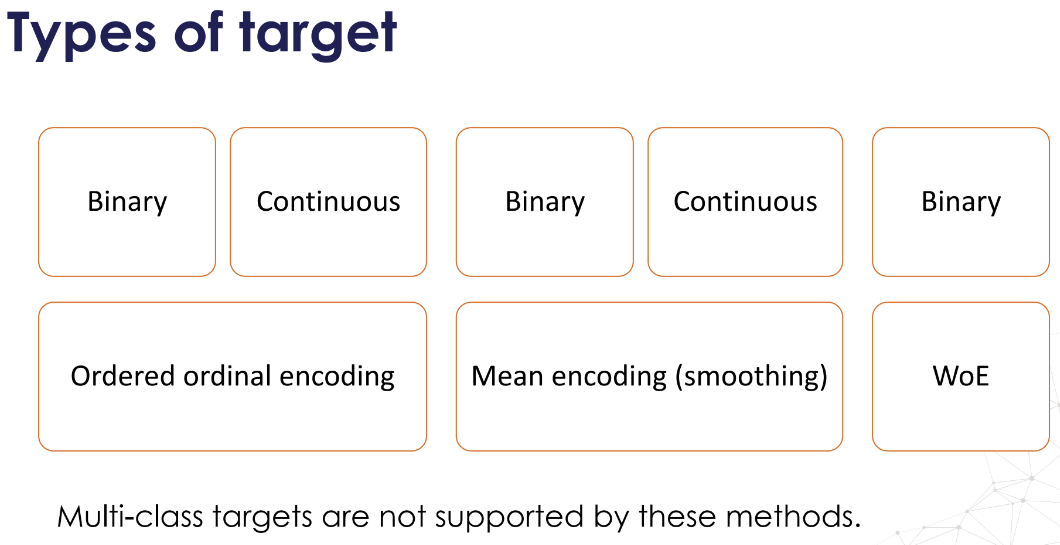

# Comparison of overall encodings

[GutHub](https://github.com/solegalli/feature-engineering-for-machine-learning/blob/main/Section-09-Categorical-Encoding-Monotonic/Comparison-categorical-encoding-techniques.ipynb)